# Spotify - Exploratory Data Analysis

#### This project attempts to analyze a Spotify dataset to identify trends and patterns among the variables, as well as also implement a Machine Learning model to predict the popualrity of a song.

#### First thing we do is import the necessary libraries. Pandas, Matplotlib, Seaborn, Numpy and Plotnine

In [2]:
# We import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotnine import *

In [3]:
# Reading the CSV file
df = pd.read_csv('spotify.csv')

#### Now that we have the dataset stored in our dataframe, we attempt to get a general overview of what the dataset looks like using the head(), shape, info() and describe() commands 

In [4]:
# Displaying top 5 rows to see what the dataset looks like
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.379,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.634,1920
1,0.993,['Mamie Smith'],0.647,163827,0.1860,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.519,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.689,1920
2,0.996,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799000,5,0.235,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.477,1920
3,0.992,['Mamie Smith'],0.782,195200,0.0573,0,5DlCyqLyX2AOVDTjjkDZ8x,0.000002,5,0.176,-12.453,1,Don't You Advertise Your Man,5,1920,0.0592,85.652,0.487,1920
4,0.996,['Mamie Smith & Her Jazz Hounds'],0.474,186173,0.2390,0,02FzJbHtqElixxCmrpSCUa,0.186000,9,0.195,-9.712,1,Arkansas Blues,0,1920,0.0289,78.784,0.366,1920


In [5]:
# Analyzing the number of rows and columns
df.shape

(174170, 19)

In [6]:
# Analyzing the data types of each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174170 entries, 0 to 174169
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174170 non-null  float64
 1   artists           174170 non-null  object 
 2   danceability      174170 non-null  float64
 3   duration_ms       174170 non-null  int64  
 4   energy            174170 non-null  float64
 5   explicit          174170 non-null  int64  
 6   id                174170 non-null  object 
 7   instrumentalness  174170 non-null  float64
 8   key               174170 non-null  int64  
 9   liveness          174170 non-null  float64
 10  loudness          174170 non-null  float64
 11  mode              174170 non-null  int64  
 12  name              174170 non-null  object 
 13  popularity        174170 non-null  int64  
 14  release_date      174170 non-null  object 
 15  speechiness       174170 non-null  float64
 16  tempo             17

In [7]:
# General statistics overview of each numerical variable
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174170.000000,174170.000000,1.741700e+05,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000,174170.000000
mean,0.499250,0.536731,2.328471e+05,0.482670,0.068071,0.196958,5.205759,0.211151,-11.752113,0.702515,25.725113,0.105757,117.008156,0.524512,1977.133513
std,0.379879,0.176019,1.484382e+05,0.272752,0.251869,0.334360,3.518141,0.180550,5.693191,0.457153,21.868069,0.182350,30.250878,0.264483,26.848629
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087800,0.414000,1.661600e+05,0.248000,0.000000,0.000000,2.000000,0.099200,-14.911000,0.000000,1.000000,0.035200,93.932250,0.310000,1955.000000
50%,0.517000,0.548000,2.057990e+05,0.465000,0.000000,0.000521,5.000000,0.138000,-10.837000,1.000000,25.000000,0.045500,115.809000,0.536000,1977.000000
75%,0.895000,0.669000,2.657330e+05,0.711000,0.000000,0.250000,8.000000,0.270000,-7.498000,1.000000,42.000000,0.076300,135.012000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


#### Now we can see what the dataset looks like thanks to the descriptive analysis done above. Now this project will attempt to analyze some variables that are considered somewhat relevant or interesting. The chosen variables for this analysis are the duration of the song, the danceability of the song, and finally the popularity of the song.

#  Song duration

#### First thing we do is plot a histogram to have a look at the distribution of the variable. In order to do so we use the Matplotlib library

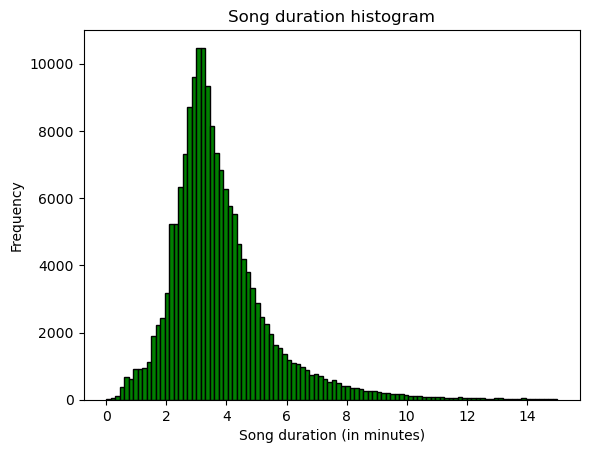

In [8]:
# Plotting the average duration
# We use a range of 0 to 15 to make the histogram more readable
# We use a green color to match the slides
# We are using matplotlib here


plt.hist(df.duration_ms/60000, bins = 100, range = (0,15), color='g', ec="black", lw=1)
plt.xlabel('Song duration (in minutes)')
plt.ylabel('Frequency')
plt.title('Song duration histogram')
plt.show()

### Some things to notice about the distribution of the song duration: 
#### - Most values fall around the 3 and 4 minute mark, which might seem strange nowadays, but considering that this dataset has songs dating back to 1920, it makes more sense to see longer-lasting songs.
#### - There are some outliers, 'songs' which last around 15 minutes maximum. It is important to notice that these are not actually songs, but song compilations.

#### In order to further increase our analysis on song duration, this project also attempts to analyze how has the average duration of a song changed over time and if there are any patterns explaining this. In order to do so, we first need to get the average duration per year. After that dataframe is created, we then plot a line graph to visualize this.

In [30]:
# We create a variable to store the average duration per song per year among the songs with a popularity of over 50
# We arbitrarily select 50 as a threshold for 'popular' songs.
# We intentionally selected only popular songs since these are the relevant ones for the analysis
# We then divide it by 60000 ms/min to get the value in minutes


average_duration_by_year = df.loc[df.popularity > 50,:].groupby('year')['duration_ms'].mean()/60000

# We create a new dataframe in order to later plot it
df_average_duration = pd.DataFrame({'Average Duration': average_duration_by_year})

df_average_duration



,Average Duration
year,
1929,3.357783
1933,3.127558
1937,2.492667
1939,3.354887
1942,2.906583
...,...
2017,3.508626
2018,3.339222
2019,3.251409


findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

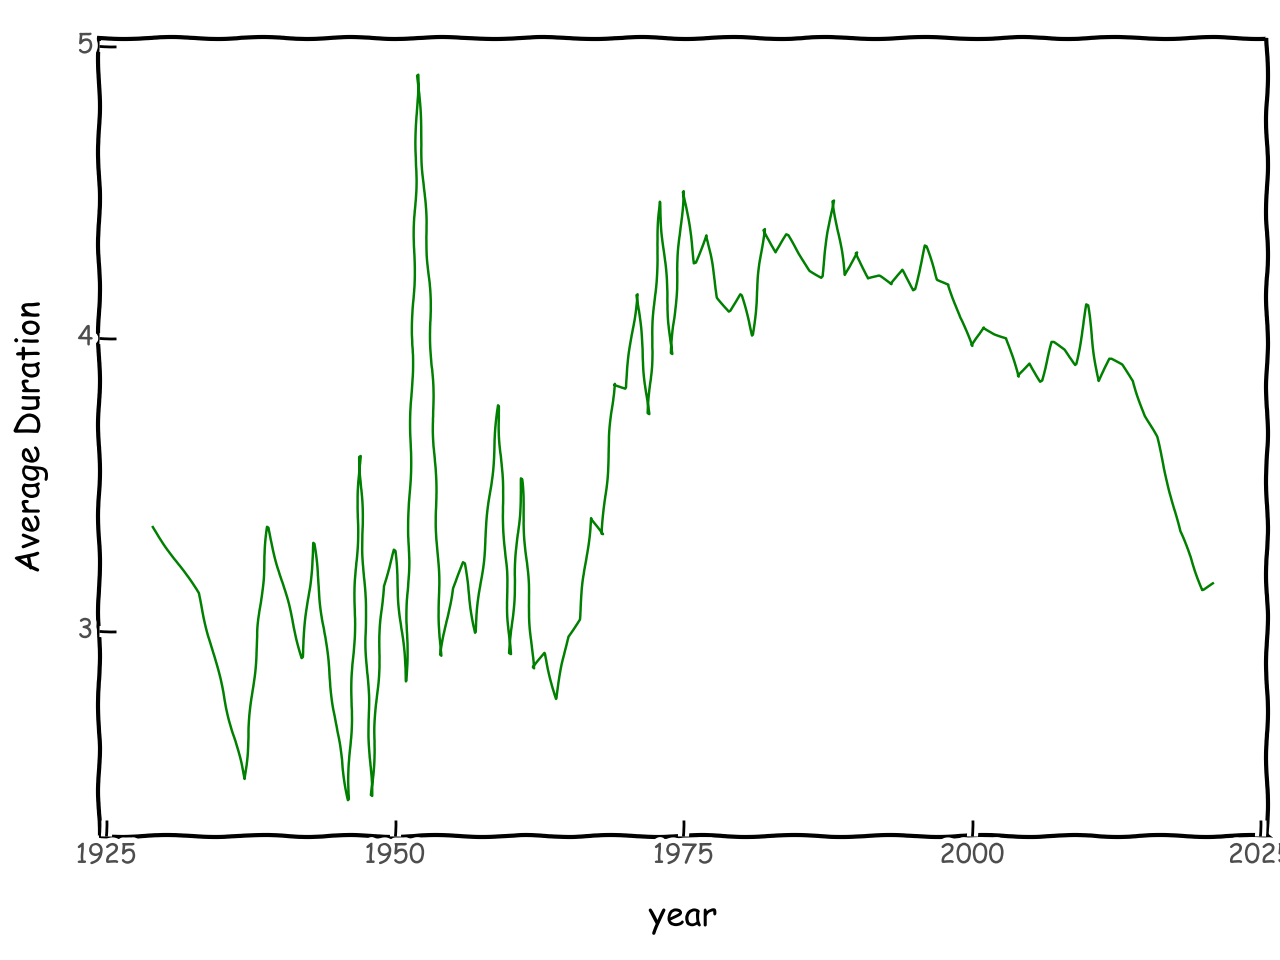

<Figure Size: (640 x 480)>

In [14]:
# We first reset the indexes
df_average_duration = df_average_duration.reset_index()


# We use plotnine to plot this graph
# In the aesthetics, we use Year in X-acis and the avg duration in the Y axis
# We use geom_line since we want to display a time series and paint it green to match our slides
# We use theme_xkcd to make it look cooler


ggplot(aes(x = 'year', y='Average Duration'), df_average_duration) + geom_line(color = 'green') + theme_xkcd()

### Some things to consider about the variation over time in average song duration:
#### - In 1952 we notice an unusual spike in average song duration. This is due to the massive increase in popularity of the "Long-Playing records", which had more capacity than previous records.
#### - From 1960 onwards, there is an increasing trend in average song duration. One interesting thing is that Rock and Roll music was born around mid 1950s. While this dataset does not contain a 'genre' category, Rock and Roll music was extremely famous during the 60s, 70s and 80s. Rock and Roll features an extense 'solo' part where usually the guitarist displays its playing abilities, which increases the song duration. While it is important to note that Rock and Roll is not the only determinant of this increase (surging of Jazz, Rhythm and Blues) it is something interesting to think about.
#### - From 2010 onwards, we notice a decrease in average song duration. One idea that immediately comes to mind is the fact that younger generations have shorter attention spans. Also, the rise of streaming platforms like Spotify promote the creation of "playlists". We could argue that songs inside of a playlist are fighting for the listener's attention, and since the chorus is the most catchy part of the song, each song wants to get to the chorus faster.

# Danceability

#### Continuing with our analysis on relevant variables, we now switch our attention to Danceability. This index basically measures how danceable a song is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. The idea with this analysis is again to analyze if there are trends or patterns. In order to start, we create a dataframe containing the 20 most danceable songs in this dataset. We are also arbitrarily selecting songs with a popularity index over 50 since the lesser known songs may be hard to find on Spotify.

In [15]:
# We create a new dataframe where we showcase the name of the song, the artists and some metrics among the popular songs
# Popular songs have over 50 in the popularity index
# We decided to select only popular songs since there were some 'danceable' songs with low popularity and did not appear on Spotify
# and then we sort these values by danceability in descending order to show the most danceable songs
# We use slicing to show the top 20 most danceable songs among those with popularity over 50

danceable_songs = df.sort_values(by = 'danceability', ascending = False).loc[df.popularity >= 50, :].loc[:,['artists','name','danceability','tempo','valence','popularity','duration_ms','acousticness','loudness']][:20]
danceable_songs

,artists,name,danceability,tempo,valence,popularity,duration_ms,acousticness,loudness
13603,['Tone-Loc'],Funky Cold Medina,0.988,117.493,0.929,56,248160,0.07550,-15.012
141222,"['Pitbull', 'Trina', 'Young Bo']",Go Girl,0.986,115.004,0.761,52,229669,0.14500,-6.809
13779,['Vanilla Ice'],Ice Ice Baby,0.980,115.744,0.675,61,271467,0.02700,-16.035
39057,['347aidan'],Dancing in My Room,0.980,119.993,0.764,84,180139,0.67100,-11.052
17497,['Vanilla Ice'],Ice Ice Baby,0.979,116.012,0.583,70,254467,0.00250,-2.784
73220,['DJ Casper'],Cha Cha Slide - Original Live Platinum Band Mix,0.978,122.027,0.496,53,387493,0.00126,-5.746
55497,"['Timbaland', 'Justin Timberlake', 'Nelly Furt...",Give It To Me,0.975,110.621,0.815,66,234027,0.16800,-3.904
158252,"['Lil Ronny Motha F', 'Lil 2z']",Killmonger,0.975,120.001,0.288,63,152214,0.04520,-10.852
89895,['Afroman'],Palmdale,0.974,117.995,0.216,51,400133,0.55500,-6.849
57891,"['Young Thug', 'Lil Baby']",Bad Bad Bad (feat. Lil Baby),0.974,111.959,0.892,72,149040,0.09760,-8.888


#### One thing that immediately stands out from this list is that the tempo of these songs mostly falls between 110-125bpm. In order to know if this is worth analyzing, we calculate the relative standard deviation for tempo and for other variables such as valence, duration and acousticness. The Relative Standard Deviation is a normailized way of measuring the deviation of the values from its mean, given that these variables range in magnitude of numbers.

findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

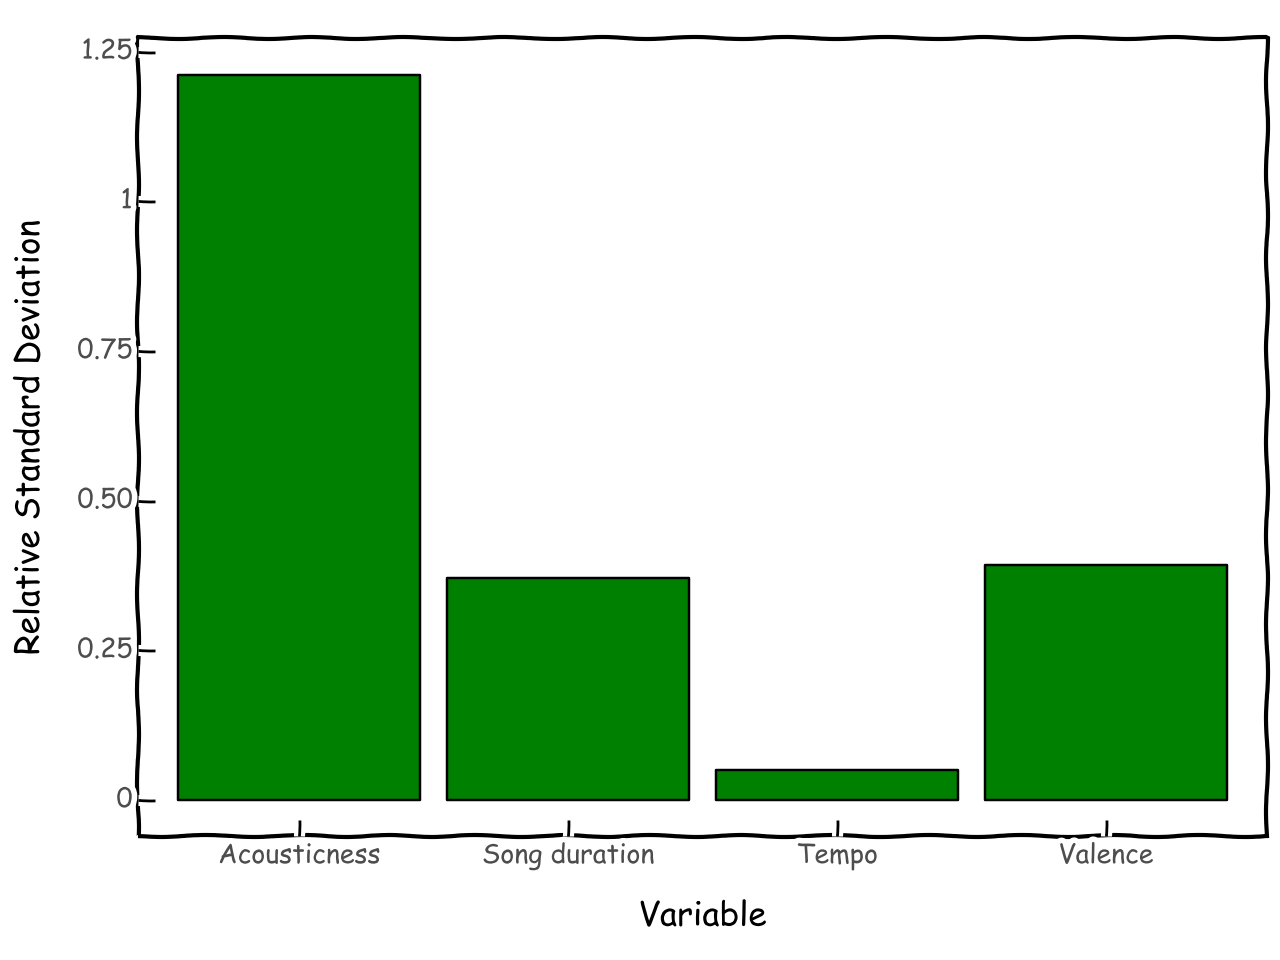

<Figure Size: (640 x 480)>

In [16]:
# We create four new variables which are the relative standard deviation of each of the four variables we are comparing
# The formula for relative standard deviation is variable standard deviation over variable mean
# RSD (Relative Standard Deviation) is a standardized way of showing and comparing standard deviations

tempo_rsd = danceable_songs.tempo.std()/danceable_songs.tempo.mean()
valence_rsd = danceable_songs.valence.std()/danceable_songs.valence.mean()
duration_rsd = danceable_songs.duration_ms.std()/danceable_songs.duration_ms.mean()
acousticness_rsd = danceable_songs.acousticness.std()/danceable_songs.acousticness.mean()

# We create a list of lists where each RSD variable has a title name

data = [
    ['Tempo',tempo_rsd],
        ['Valence', valence_rsd],
        ['Song duration', duration_rsd],
        ['Acousticness', acousticness_rsd],
       ]


# We create a new dataframe with the RSD variables and the names

rsd_df = pd.DataFrame(data, columns = ['Variable','RSD'])

# We will be using plotnine for this graph
# We use geom_col instead of geom_bar because we are not trying to count the values, we are trying to display them
# We use Variable in x axis and RSD in y axis
# We use xkcd to make it look cooler and add labels to the axis with xlab and ylab


ggplot(aes(x = 'Variable', y = 'RSD'), rsd_df) + geom_col(fill = 'green', color = 'black') + theme_xkcd()\
            + xlab('Variable') + ylab('Relative Standard Deviation')


### Some things to consider about the variability in tempo
#### - Our body is biomechanically designed in a specific way. Our limbs have specific lenghts and winghts. Our bones have specific compositions. Given this fact, there is a range of tempo where our body feels more comfortable to move in. We could even hypothesize that if our bodies were designed in a different way (lets say, longer limbs) we would be slower and maybe clumsier. If this is true, then it is also possible that our bodies feel more comfortable dancing to a slower tempo. 
#### - These type of songs maintain the tempo/base constant. This creates a sense of comfortability to our ears in the sense that our body can 'predict' what is coming in terms of rythm, so a person dancing feels comfortable chaining multiple dance moves since this person already knows what is coming next. Jazz is the counter example since it is a very creative genre in the sense that artists vary and experiment with rythms all the time. It is very complicated for a non jazz-trained person to dance to this sort of music.

### Furthermore, we now would like to analyze how danceability correlates with other variables. In order to do so, we plot a correlation matrix and then its heatmap to visualize these correlations. We will again be using Matplotlib to do so.

In [17]:
# We analyze the correlation of danceability to other numerical variables

df.corrwith(df.danceability)

C:\Users\manul\AppData\Local\Temp\ipykernel_15660\4206539982.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


acousticness       -0.263007
danceability        1.000000
duration_ms        -0.100978
energy              0.204929
explicit            0.200995
instrumentalness   -0.215807
key                 0.026329
liveness           -0.109886
loudness            0.249855
mode               -0.048226
popularity          0.124096
speechiness         0.240058
tempo               0.005147
valence             0.537321
year                0.159979
dtype: float64

C:\Users\manul\AppData\Local\Temp\ipykernel_15660\3772081064.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


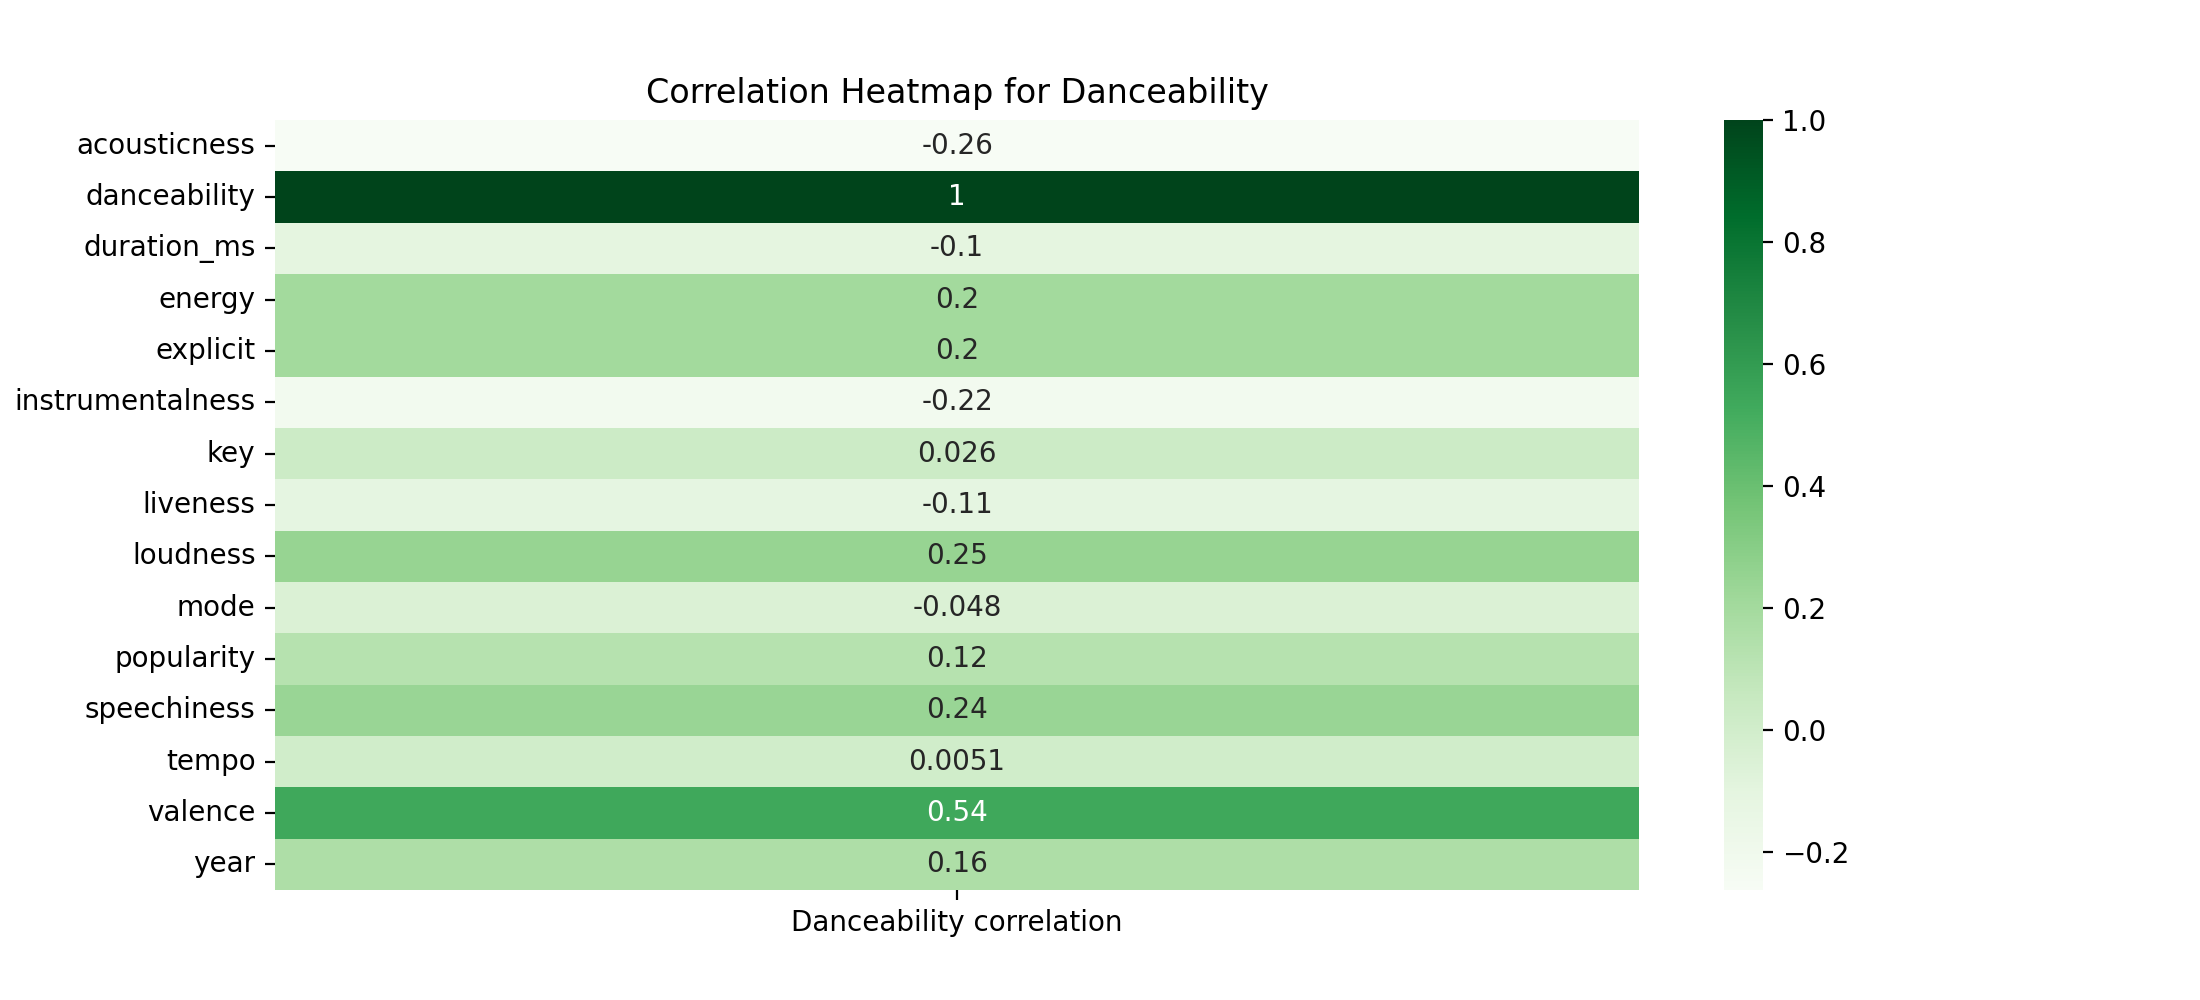

In [27]:
# We store the correlation dataframe 
danceability_correlation = df.corrwith(df.danceability)

# Create correlation matrix
corr_matrix = pd.DataFrame(danceability_correlation, columns=['Danceability correlation'])

# We use matplotlib for this one

plt.figure(figsize=(11, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap for Danceability')
plt.show()


### Some things to consider about the correlation of danceability and other variables:
#### - The strong positive correlation with valence (how positive the song is) makes a lot of sense. Think about a song you can dance to and it will most likely show positive feelings and words. One thing to consider though, is that while most danceable songs are positive, not all positive songs are danceable (think about a love ballad for example).
#### - The correlation of 24% between danceability and speechiness makes sense when you observe the type of songs that are included in the top 20 most danceable songs displayed before. Even though the dataset does not contain a 'genre' category (which would enrich the analysis), after doing some investigation we can see that these songs are mostly hip-hop songs. In this genre, apart from its catchy rythms and bouncy beats, the 'rapper' displays its lyrical abilities with rhymes and different techniques, hence spitting out a lot of words per minute.

# Popularity

#### We get to our last variable, and probably our most interesting one. Our main motivation here is to be able to predict how popular a song will be based on specific attributes. Prior to implementing the Machine Learning models, we plot a correlation matrix of popularity to see how it correlates to other variables in the model. This will give us a general idea of which variables might play a significant role in the Machine Learning model.

In [19]:
# We analyze the correlation of danceability to other numerical variables


df.corrwith(df.popularity)

C:\Users\manul\AppData\Local\Temp\ipykernel_15660\2824793938.py:4: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


acousticness       -0.397431
danceability        0.124096
duration_ms         0.024451
energy              0.329550
explicit            0.153128
instrumentalness   -0.300247
key                 0.001805
liveness           -0.079225
loudness            0.337850
mode                0.007338
popularity          1.000000
speechiness        -0.195693
tempo               0.095065
valence             0.063663
year                0.512030
dtype: float64

C:\Users\manul\AppData\Local\Temp\ipykernel_15660\2513451262.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


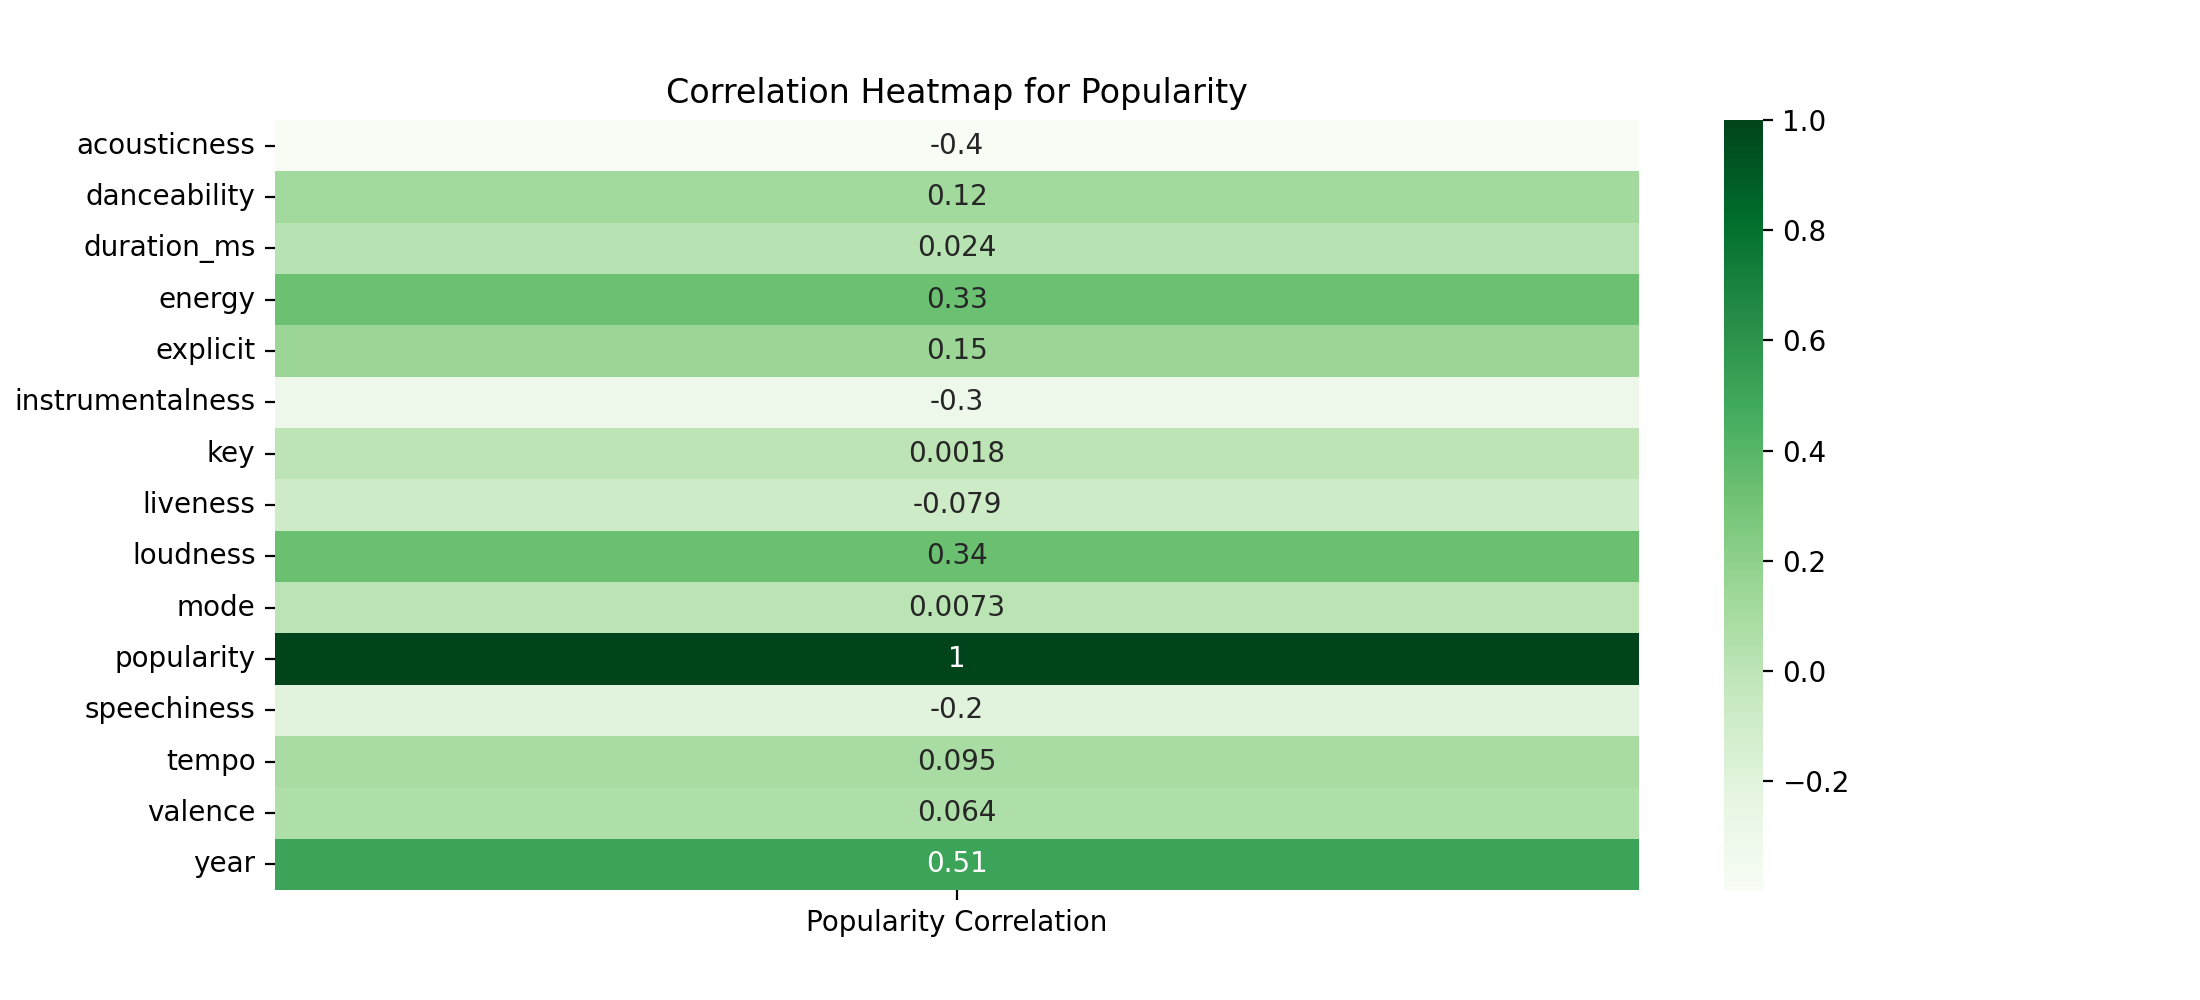

In [21]:
# We store the correlation dataframe 
popularity_correlation = df.corrwith(df.popularity)

# Create correlation matrix
corr_matrix = pd.DataFrame(popularity_correlation, columns=['Popularity Correlation'])

# Again, we use matplotlib

popu_corr = plt.figure(figsize=(11, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Heatmap for Popularity')
plt.show()

### Some things to consider about the correlation of popularity and other variables:
#### - Year has a high correlation with popularity. This is one limitation of the dataset, since it has some sort of recency bias in the sense that the more recent songs are favoured in popularity. This makes sense since the number of Spotify users is increasingly evolving day by day, and since the popularity index considers how recently the song has been played (among other things), if we have 2 songs with the same attributes, except that one was released in 1990 and the other one in 2021, the one from 2021 will be more popular according to the index.
#### - Another interesting thing to notice is that there is a 30% negative correlation between the popularity of a song and the instrumentalness of it. The instrumentalness index measures if a track has vocals or not. If the index is very high, that means that there are very few vocals, and viceversa. What this tells us is that if two songs have the same attributes but one has someone singing over it and the other one doesnt, it is very likely that the vocal one will be more popular. This makes sense since people are able to remember the vocal song more easily due to the lyrics. Whether it is for the lyrics being catchy, funny, smart, interesting, depressing, or whatever emotion they might convey, the lyrics act as a sort of a strap which attaches to the listener's mind.

# Machine Learning - Applying statistical models

#### We have reached the most interesting part of the project, which is the Machine Learning part. Our main idea will be to predict the popularity of a song given the numerical attributes of the dataset. In order to do so, we will try out three different models: Linear Regression, Decision Tree and Random Forest. The one with the lowest Mean Absolute Error will be the chosen one. In order to do so we need to import differnet modules from the SKLearn library such as Train/Test split, Linear Regression model, Decision Tree Regressor and Random Forest Regressor.

In [41]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [43]:
# Using all numerical variables as features
X = df[['danceability', 'energy', 'tempo','acousticness','duration_ms','instrumentalness','key','speechiness','valence','explicit','liveness','loudness','mode','year']]
y = df['popularity']

In [44]:
# We split training and test set 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression model

In [45]:
reg = linear_model.LinearRegression()

In [46]:
reg.fit(X_train, y_train)

LinearRegression()

In [47]:
lr_predict = reg.predict(X_test)

In [48]:
r2_lr = reg.score(X_test, y_test)
print('The R2 score for this model is :',r2_lr)
print('The MSE mean_squared_error for this model is: ', mean_squared_error(y_test, lr_predict))

The R2 score for this model is : 0.3662766926978862
The MSE mean_squared_error for this model is:  302.639090096317


## Decision Tree model

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [50]:
tree_model = DecisionTreeRegressor()

In [51]:
tree_model = tree_model.fit(X_train, y_train)

In [52]:
tree_model.feature_importances_

array([0.03577087, 0.04053405, 0.03457937, 0.04023379, 0.04851825,
       0.07879511, 0.01564234, 0.03437105, 0.03709176, 0.01495279,
       0.0345358 , 0.05278235, 0.00285701, 0.52933544])

In [53]:
dt_predict = tree_model.predict(X_test)

In [55]:
r2_dt = tree_model.score(X_test,y_test)
print('The R2 score for the decision tree model is :', r2_dt)
print('The MSE for the decision tree model is :', mean_squared_error(y_test, dt_predict))

The R2 score for the decision tree model is : 0.361184171409229
The MSE for the decision tree model is : 305.0710599975922


## Random Forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor


In [57]:
random_forest = RandomForestRegressor()

In [58]:
random_forest.fit(X_train, y_train)
random_forest.feature_importances_

array([0.03670496, 0.04016286, 0.03404119, 0.03808416, 0.04682237,
       0.07799195, 0.0148104 , 0.03545092, 0.03579004, 0.0148826 ,
       0.03587397, 0.05263022, 0.00310729, 0.53364707])

In [59]:
rf_predict = random_forest.predict(X_test)

In [60]:
r2_rf = random_forest.score(X_test,y_test)
print('The R2 score for the Random Forest model is: ',r2_rf)

The R2 score for the Random Forest model is:  0.687460311337463


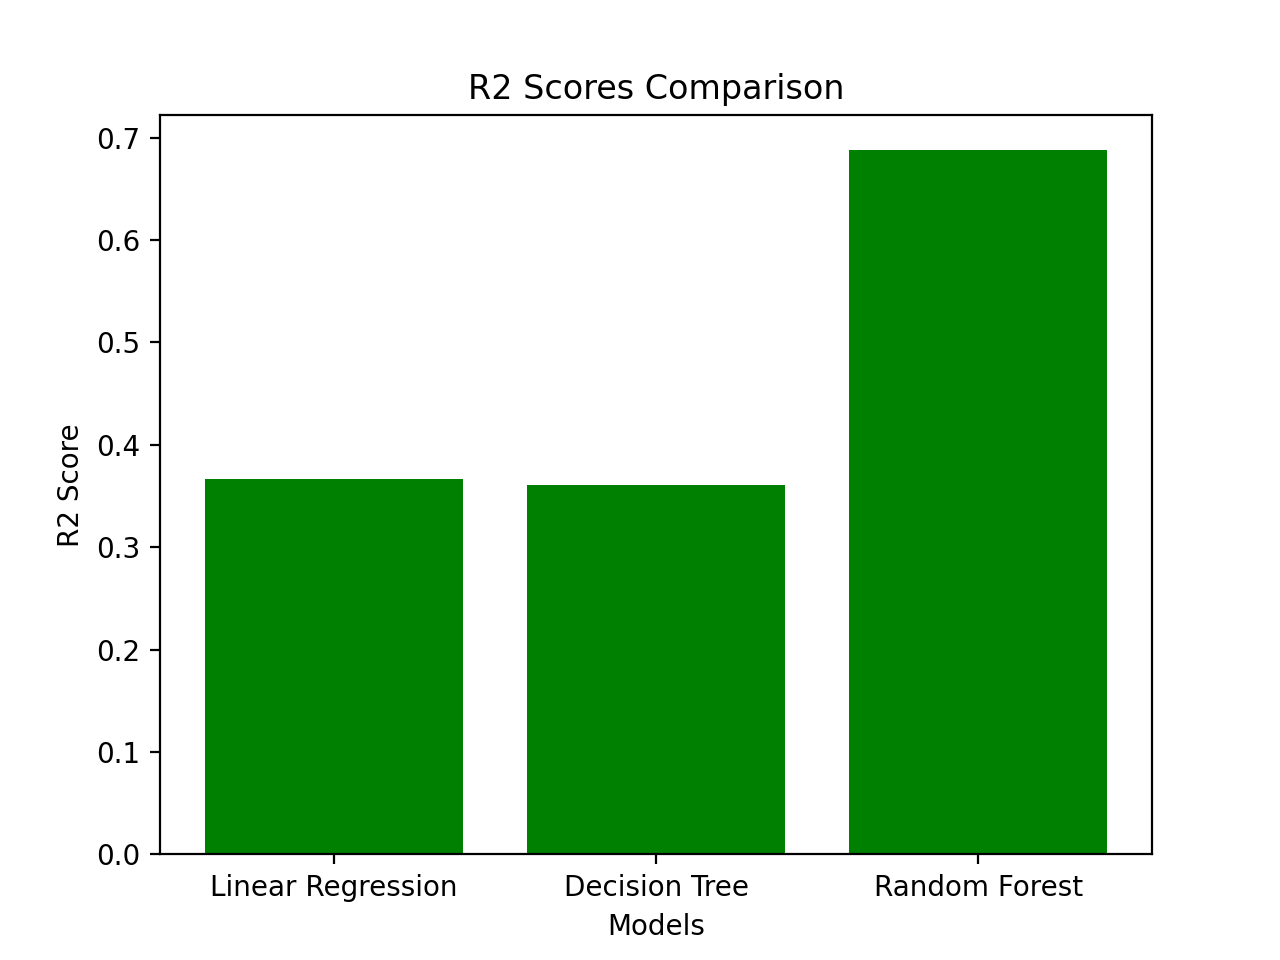

In [61]:
import matplotlib.pyplot as plt

r2_scores = [r2_lr, r2_dt, r2_rf]


labels = ['Linear Regression', 'Decision Tree', 'Random Forest']

# Plotting the R2 scores
plt.bar(labels, r2_scores, color ='g')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores Comparison')
plt.show()


In [62]:
data = [
    ['Linear Regression model', lr_predict , y_test, abs(lr_predict - y_test).mean()],
    ['Decision Tree model', dt_predict, y_test, abs(dt_predict - y_test).mean()],
    ['Random Forest model', rf_predict, y_test, abs(rf_predict - y_test).mean()]
]

#Setting up names for columns
columns = ['Model', 'Predicted value', 'Actual value', 'MAE']

#Creating a new dataframe
model_compare = pd.DataFrame(data, columns=columns)

#Observing the dataframe
model_compare[['Model','MAE']]

,Model,MAE
0,Linear Regression model,13.427122
1,Decision Tree model,10.568850
2,Random Forest model,8.161773


findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

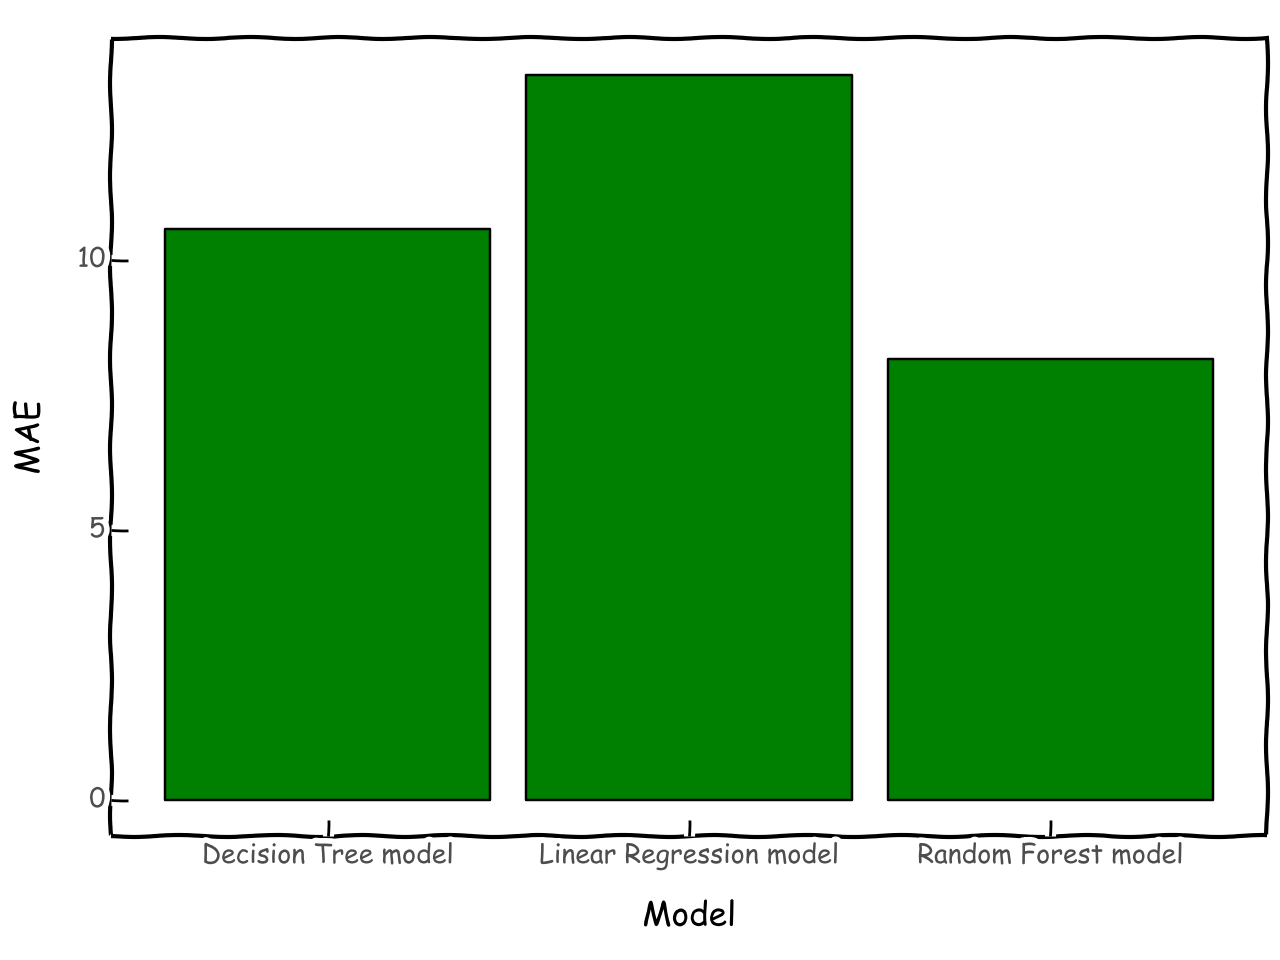

<Figure Size: (640 x 480)>

In [63]:
# We plot the MAEs in a column/bar chart

ggplot(aes(x = 'Model', y = 'MAE'), model_compare) + geom_col(fill = 'green', color = 'black') + theme_xkcd()


In [64]:
data1 = [
    ['Linear Regression model', lr_predict , y_test, abs(lr_predict - y_test)],
    ['Decision Tree model', dt_predict, y_test, abs(dt_predict - y_test)],
    ['Random Forest model', rf_predict, y_test, abs(rf_predict - y_test)]
]

#Setting up names for columns
columns = ['Model', 'Predicted value', 'Actual value', 'MAE']

#Creating a new dataframe
model_compare1 = pd.DataFrame(data1, columns=columns)

#Observing the new dataframe
model_compare1[['Model','MAE']]

,Model,MAE
0,Linear Regression model,144576 3.269557 41794 3.949711 18549 ...
1,Decision Tree model,144576 0.0 41794 0.0 18549 78.0 1...
2,Random Forest model,144576 3.430000 41794 0.110000 18549 ...


In [65]:
#Creating a dataframe with the prediction of the Random forest, the actual value of the test sample and the MAE

results = pd.DataFrame()
results["Predictions"] = rf_predict
results["Actual_values"] = y_test.values
results["Absolute error"] = abs(results.Actual_values-results.Predictions)
results.describe()

,Predictions,Actual_values,Absolute error
count,34834.000000,34834.000000,34834.000000
mean,25.880642,25.628265,8.161773
std,17.842033,21.853394,9.090841
min,0.000000,0.000000,0.000000
25%,6.520000,1.000000,1.790500
50%,30.485000,25.000000,5.473750
75%,39.453333,42.000000,11.176250
max,84.383333,96.000000,72.668333


### Absolute error distribution

C:\Users\manul\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 127'. Pick better value with 'binwidth'.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Hum

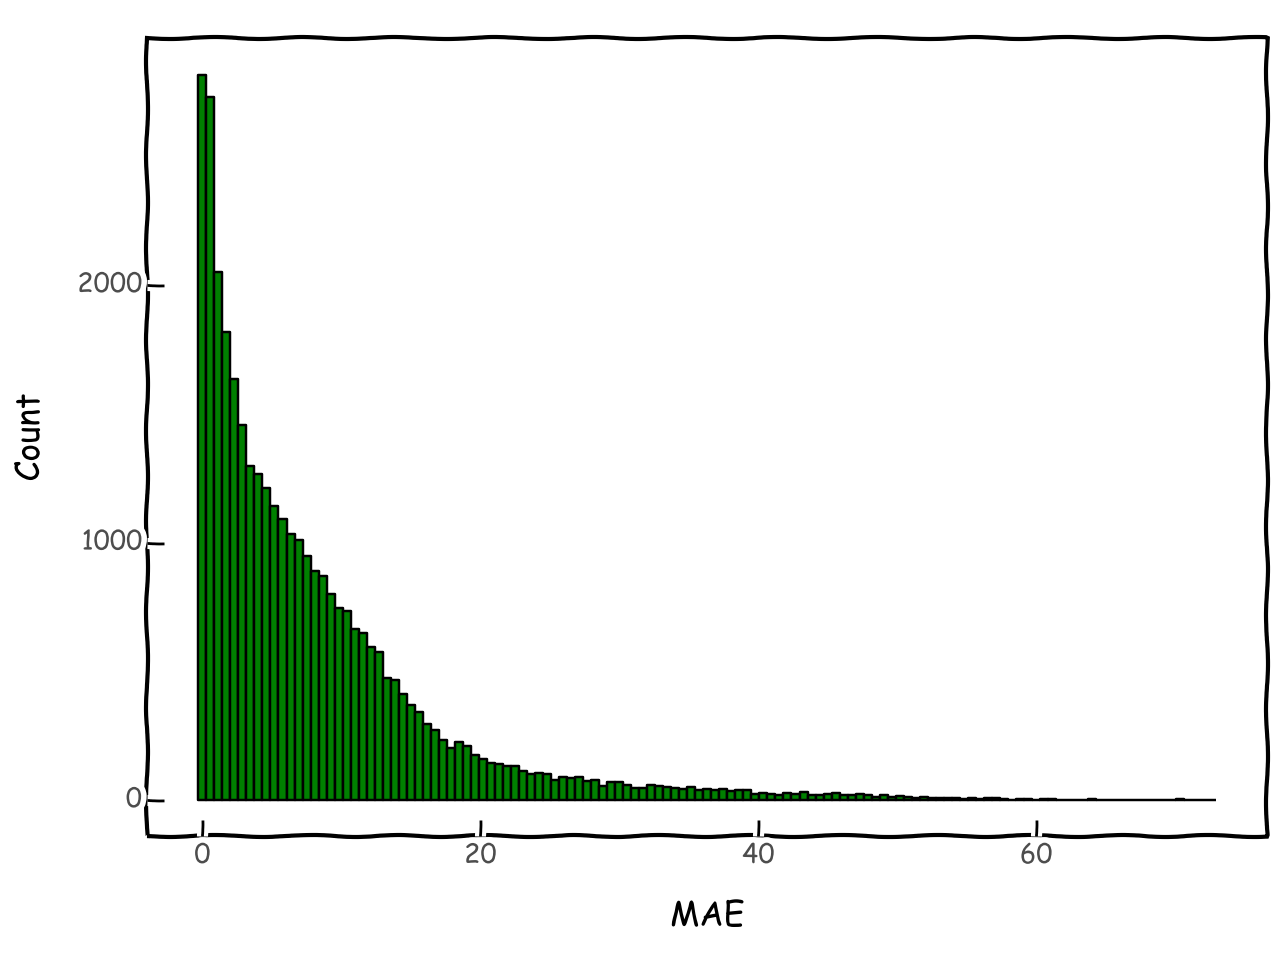

<Figure Size: (640 x 480)>

In [67]:
from plotnine import *
# We plot a histogram of the absolute errors of the model using plotnine
# We tune it so it looks nice

ggplot(aes(x="Absolute error"),results)+geom_histogram(fill = 'green', color='black') + theme_xkcd() + xlab('MAE') + \
        ylab('Count')


### Scatter plot - Predictions vs Reality

findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'xkcd' not found.
findfont: Font

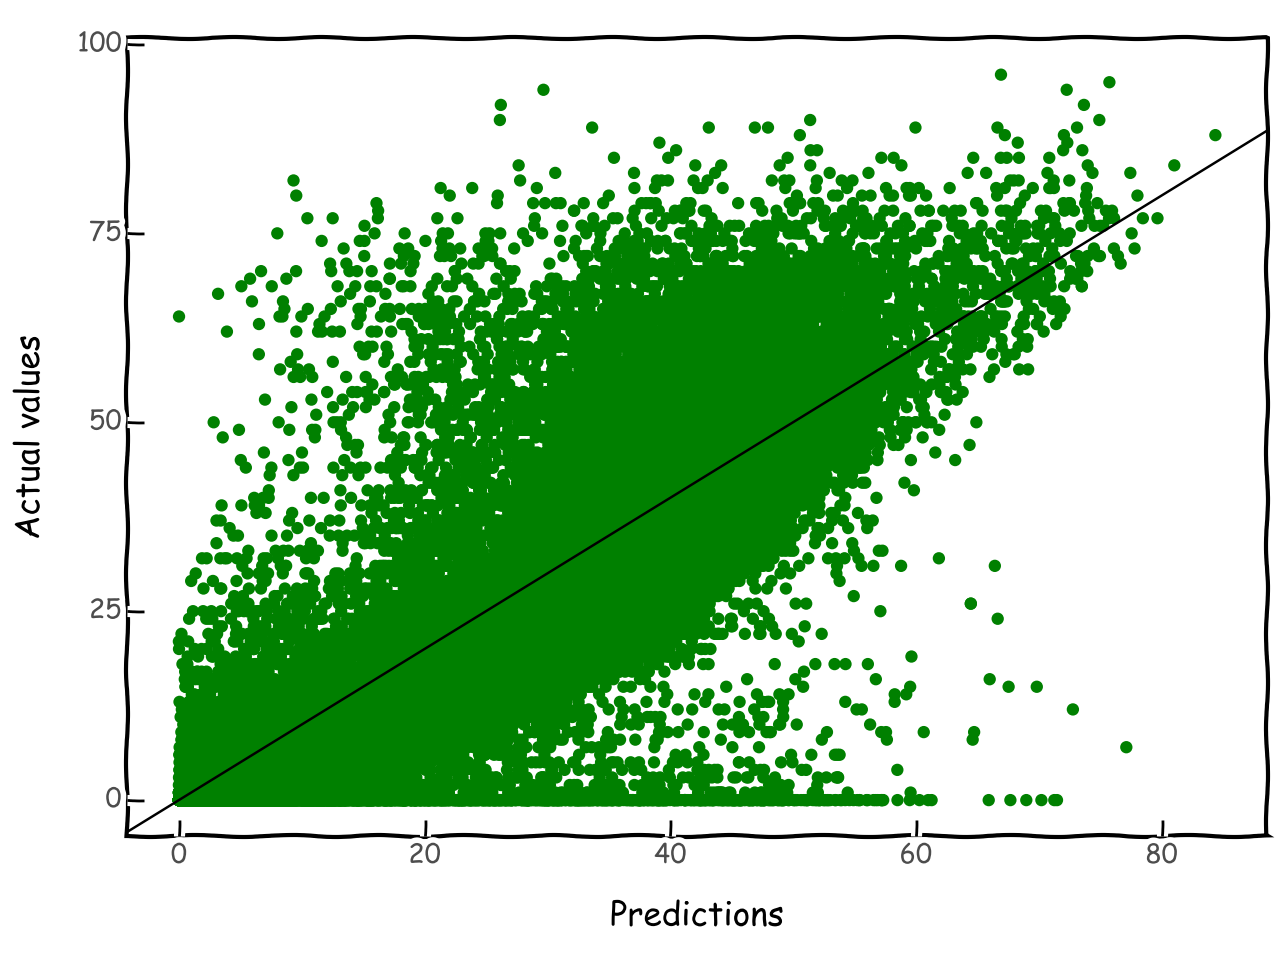

<Figure Size: (640 x 480)>

In [68]:
# We plot a scatter plot of the predictions of the model vs the actual values of the test sample using plotnine
# We also plot the line with a slope of 1 to show distance to a perfect model

ggplot(aes(x="Predictions",y="Actual_values"),results)+geom_point(color = 'green')+geom_abline(slope=1,color="black")+theme_xkcd() \
            +xlab('Predictions') + ylab('Actual values')


### Feature importances

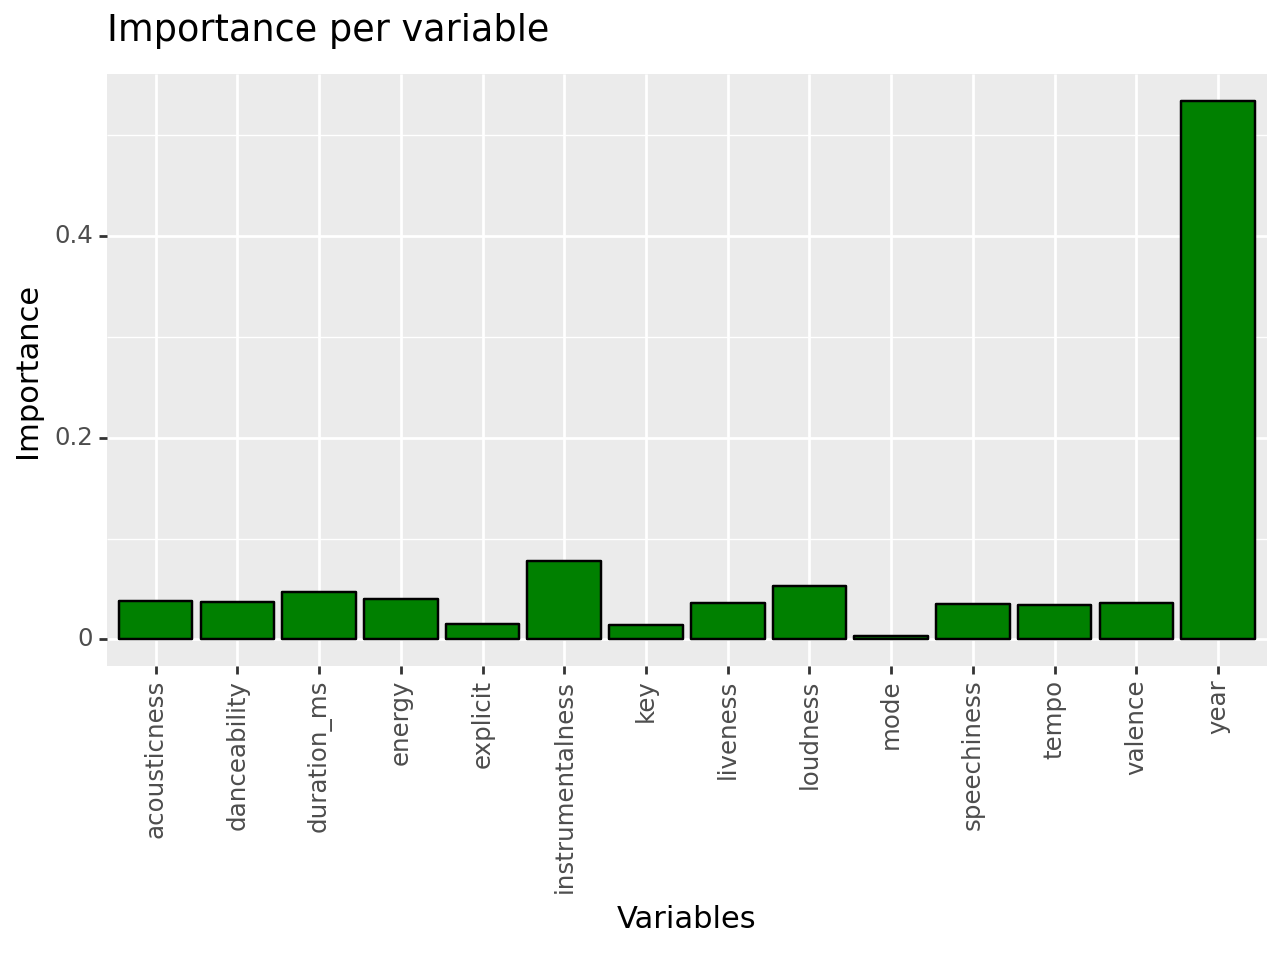

<Figure Size: (640 x 480)>

In [69]:
# We create a dataframe which contains two columns, one for the variable and another one for its importance

importance = pd.DataFrame()
importance["imp"] = random_forest.feature_importances_
importance["vble"] = X.columns
importance = importance.sort_values(by = 'imp', ascending = False)

# We plot a bar chart to show importances uwing plotnine
# We use a 90 degree rotation of the variable labels so that they do not overlap

ggplot(aes(x = 'vble', y = 'imp'), importance) + geom_col(fill = 'green', color = 'black') + \
           ggtitle('Importance per variable') + theme(axis_text_x=element_text(rotation=90, hjust=0.5))\
          + xlab('Variables') + ylab('Importance')

           

# Conclusion

### What this Machine Learning model tells us is that, for this dataset, the most important variable in order to predict the popularity of a song is the year in which it was released. Although it does make some sense, we would actually like to predict which musical metrics or attributes the song needs to have in order to be a guaranteed hit. The recency bias that this dataset presents is not so much caused by a flaw in the dataset, but more by a flaw in the construction of the popularity index of Spotify, since it favours the more popular songs.

### One thing that this dataset does not take into consideration is the fact that there is a lot of retroactivity in the popularity of the artist which translates to the popularity of a song. This means that the probability that, for example, Drake's next song is a hit is much higher than the probability that a lesser known artist's next song is a hit, considering equal musical attributes. This is because Drake already has an existing fan base that will still stream the song no matter its musical qualities.

### Another limitation of the dataset is that it does not have a 'genre' column to categorize each song. This would most definitely enrich the analysis. It would be very interesting which genre has the loudest, most popular, most danceable songs, among many different possible analysis and hypothesis.

### Finally, one last limitation of the dataset is that it does not account for the amount of money that each label record puts into the advertisement of the song. This is a major factor in the popularity's prediction, since the more present the song is (or at least a part of the song) on social media platforms/TV/Internet, the more likely it is that it will be popular.